In [9]:
# Importando as bibliotecas e módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from asd import dataset, utilits, metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import sklearn.metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Criando dataframe
df = dataset.autism()
# Tratamento dos dados
X,Y = dataset.basicResourceEngineering(df)

In [11]:
# Variáveis Independentes
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,0,0,1,1,0,1,0,0
1,1,1,0,0,1,1,0,1,0,0
2,1,1,0,0,0,1,1,1,0,0
3,0,1,0,0,1,1,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1


In [12]:
# Variável Dependente
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Class/ASD, dtype: int64

# KNN - K Nearest Neighbors

**Funcionamento:** O KNN é um algoritmo supervisionado que pode ser construído tanto para Classificação quanto para Regressão. Seu funcionamento é bem simples:

**1.** Calcula-se a distância entre a nova observação e as demais;

**2.** Ordena-se todas as distâncias de forma Crescente ou Decrescente, dependendo da aplicação;

**3.** Retorna as K melhores observações que tiveram as melhores distâncias.


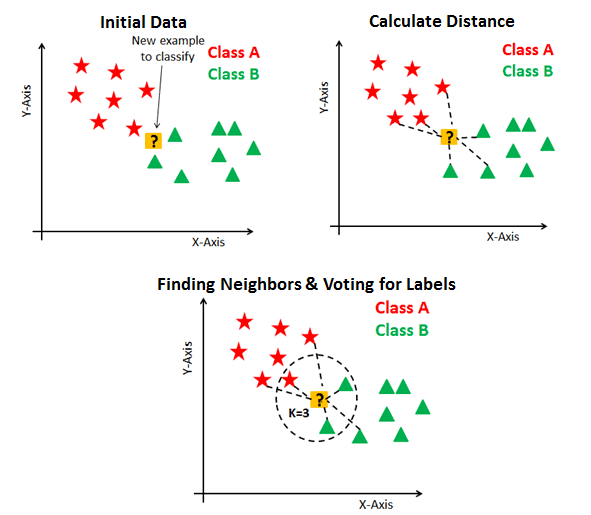

In [13]:
# Modelo
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# Seleção do Melhor K e melhor Distância
# A formulado cálculo da distância é Minkowski, ou seja:

# P = 2 -> Cálculo da distância Euclidiana
# P = 1 - > Calculo da distância de Manhatan

kGroup = [1,2,3,4,5,6,7,8,9,10]
leafGroup = [1,2,3,4,5,6]

In [15]:
# Validação cruzada
def crossValidation(model,X,Y,splits):
    metricas = []
    i = 0
    skf = StratifiedKFold(n_splits = splits, shuffle = True, random_state = 1)
    # Separando as bases de treino e teste
    for train,test in skf.split(X,Y):
        # Dicionaro de treino
        train_x, test_x = X.iloc[train], X.iloc[test]
        train_y, test_y = Y.iloc[train], Y.iloc[test]
        aux = model.fit(train_x,train_y)
        rst = aux.predict(test_x)
        metricas.append(metrics.classification_report(test_y, rst))
        i+=1
    return metricas

In [16]:
optimizerParams = {'k':[],'leaf':[],'accuracy':[],'precision':[],'recall':[],'f1':[]}
splits = 5
# Otimização de parâmetros
for k in kGroup:
    for leaf in leafGroup:
        knn = KNeighborsClassifier(n_neighbors = k, leaf_size = leaf)
        metricas = crossValidation(knn,X,Y,splits)        
        optimizerParams['k'].append(k)
        optimizerParams['leaf'].append(leaf)
        optimizerParams['accuracy'].append(np.mean(np.array([metricas[x]['accuracy'] for x in range(5)])))
        optimizerParams['precision'].append(np.mean(np.array([metricas[x]['precision'] for x in range(5)])))
        optimizerParams['recall'].append(np.mean(np.array([metricas[x]['recall'] for x in range(5)])))
        optimizerParams['f1'].append(np.mean(np.array([metricas[x]['f1'] for x in range(5)])))
        
Optimizer = pd.DataFrame.from_dict(optimizerParams)

In [17]:
Optimizer

,k,leaf,accuracy,precision,recall,f1
0,1,1,0.928304,0.942449,0.927312,0.933240
1,1,2,0.904984,0.936190,0.914194,0.923389
2,1,3,0.904984,0.936190,0.914194,0.923389
3,1,4,0.928939,0.937005,0.927312,0.930384
4,1,5,0.928939,0.937005,0.927312,0.930384
5,1,6,0.928939,0.937005,0.927312,0.930384
6,2,1,1.028141,0.919862,0.980000,0.948792
7,2,2,1.028459,0.914871,0.980000,0.946014
8,2,3,1.028459,0.914871,0.980000,0.946014
9,2,4,1.028459,0.914871,0.980000,0.946014


In [18]:
for col in ["accuracy","precision","recall","f1"]:
    print("Combinação com melhor {}: k={} e leaf_size={} --- Score do Grupo: {}".format(col,Optimizer[Optimizer[col] == Optimizer[col].max()]["k"].unique(),Optimizer[Optimizer[col] == Optimizer[col].max()]["leaf"].unique(),Optimizer[col].max()))

Combinação com melhor accuracy: k=[2] e leaf_size=[2 3 4 5 6] --- Score do Grupo: 1.0284587813620072
Combinação com melhor precision: k=[9] e leaf_size=[1 2 3 4 5 6] --- Score do Grupo: 1.0
Combinação com melhor recall: k=[2] e leaf_size=[1 2 3 4 5 6] --- Score do Grupo: 0.9800000000000001
Combinação com melhor f1: k=[2] e leaf_size=[1] --- Score do Grupo: 0.9487916866023687


# SVM - Support Vector Machine

**Funcionamento:** O SVM é um modelo supervisionado de algoritmos de aprendizagem de máquina que tem como o objetivo uma região de separação que separe as duas classes de forma a formar uma melhor "margem de segurança". O tamanho dessa "margem" pode ser controlada alterando o valor de uma constante C, que ela basicamente permite a grosso modo que existam observações que "burlem" essa margem.

**Obs:** Quanto menor o valor de C menor é o tamanho da "margem", quanto maior o valor de C maior é a "margem".

**Exemplo de um SVM Linear**

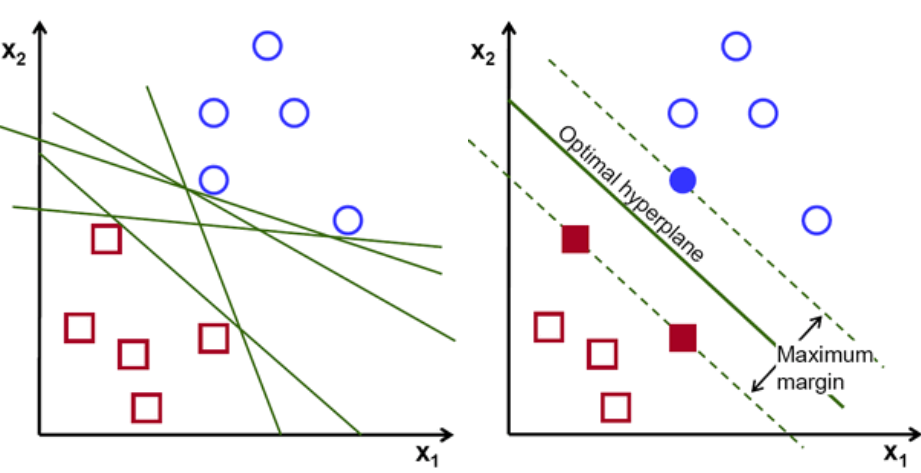

In [19]:
svm = SVC(kernel= 'linear')
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
# Selecionando o melhor valor de C

C = [0.01,0.1,1,10,50,100]
kernels = ["linear","poly","rbf","sigmoid"]

In [21]:
optimizerParams = {'kernel':[],'C':[],'accuracy':[],'precision':[],'recall':[],'f1':[]}
splits = 5
# Otimização de parâmetros
for kernel in kernels:
    for c in C:
        svm = SVC(kernel= kernel, C = c)
        metricas = crossValidation(svm,X,Y,splits)
        optimizerParams['kernel'].append(kernel)
        optimizerParams['C'].append(c)
        optimizerParams['accuracy'].append(np.mean(np.array([metricas[x]['accuracy'] for x in range(5)])))
        optimizerParams['precision'].append(np.mean(np.array([metricas[x]['precision'] for x in range(5)])))
        optimizerParams['recall'].append(np.mean(np.array([metricas[x]['recall'] for x in range(5)])))
        optimizerParams['f1'].append(np.mean(np.array([metricas[x]['f1'] for x in range(5)])))
        
Optimizer = pd.DataFrame.from_dict(optimizerParams)

In [22]:
Optimizer

,kernel,C,accuracy,precision,recall,f1
0,linear,0.01,0.942738,0.978519,0.933763,0.955316
1,linear,0.10,1.015606,0.987500,0.973333,0.979632
2,linear,1.00,1.070936,1.000000,1.000000,1.000000
3,linear,10.00,1.070936,1.000000,1.000000,1.000000
4,linear,50.00,1.070936,1.000000,1.000000,1.000000
5,linear,100.00,1.070936,1.000000,1.000000,1.000000
6,poly,0.01,1.035468,0.517126,1.000000,0.681718
7,poly,0.10,1.056178,0.802608,1.000000,0.889494
8,poly,1.00,1.068998,0.974597,1.000000,0.986991
9,poly,10.00,1.070936,1.000000,1.000000,1.000000


# Comparação dos Modelos

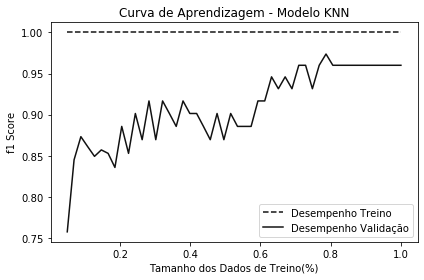

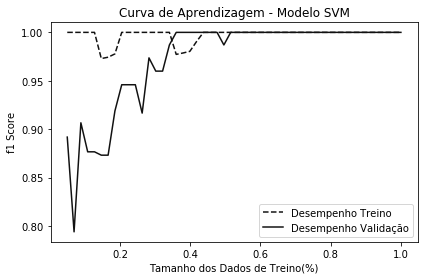

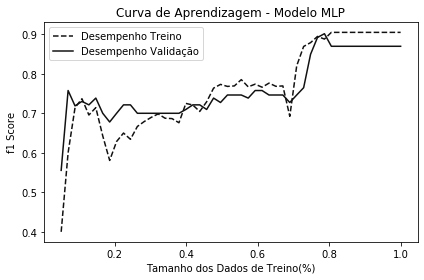

In [23]:
# Modelos
# Se quiser testar mais modelos para ver a curva de aprendizagem, basta:
# model.append(("nome do modelo",model sklearn))
models = []
models.append(("KNN",KNeighborsClassifier(n_neighbors=1, leaf_size=4)))
models.append(("SVM",SVC(kernel='linear')))
models.append(("MLP",MLPClassifier(solver='adam',
                          alpha = 1e-5,
                          hidden_layer_sizes=(15,10),
                          random_state=1,
                          max_iter=150)))

for model in models:
    utilits.learning_curve(model[1], model[0], X, Y, 'f1', 0.8)
